In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def func(x):
    return np.cosh(x) + x * np.sinh(x)

In [41]:
def system_ode(x, y):
    result = np.zeros((len(y), 1))
    result[0] = y[1]
    result[1] = func(x) - np.cosh(x) * y[1] - np.sinh(x) * y[0]
    return result

In [42]:
def solution(x):
    return np.exp(-np.sinh(x)) + x

In [43]:
def euler(system, a, b, h, y0):
    xrange = np.arange(a, b, h)
    result = np.zeros((len(y0), len(xrange)))
    result[:, 0] = y0[:, 0]
    for i in range(1, len(xrange)):
        x = xrange[i - 1]
        result[:, i] = result[:, i - 1] + h * system(x, result[:, i - 1])[:, 0]
    return result

In [44]:
def runge_kutta4(system, a, b, h, y0):
    xrange = np.arange(a, b, h)
    result = np.zeros((len(y0), len(xrange)))
    result[:, 0] = y0[:, 0]
    for i in range(1, len(xrange)):
        x = xrange[i - 1]
        k1 = system(x, result[:, i - 1])[:, 0]
        k2 = system(x + h/2, result[:, i - 1] + h*k1/2)[:, 0]
        k3 = system(x + h/2, result[:, i - 1] + h*k2/2)[:, 0]
        k4 = system(x + h, result[:, i - 1] + h*k3)[:, 0]
        result[:, i] = result[:, i - 1] + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return result

In [45]:
def adams3(system, a, b, h, y0):
    xrange = np.arange(a, b, h)
    result = np.zeros((len(y0), len(xrange)))
    result[:, 0:3] = runge_kutta4(system, a, a + 3 * h, h, y0)[:, 0:3]
    for i in range(3, len(xrange)):
        prev1 = system(xrange[i - 1], result[:, i - 1])[:, 0]
        prev2 = system(xrange[i - 2], result[:, i - 2])[:, 0]
        prev3 = system(xrange[i - 3], result[:, i - 3])[:, 0]
        result[:, i] = result[:, i - 1] + h * ((23/12) * prev1 - (16/12) * prev2 + (5/12) * prev3)
    return result

In [46]:
def main1():
    x0 = 0
    xend = 5
    h = 0.01
    xrange = np.arange(x0, xend, h)
    system = system_ode
    y0 = np.array([[1], [0]])
    sol = solution

    number_of_methods = 6

    plt.subplot(2, number_of_methods, 1)
    plt.title("Метод Эйлера")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.grid()
    plt.plot(xrange, euler(system, x0, xend, h, y0)[0, :], color='k', label='Численное значение')
    plt.plot(xrange, sol(xrange), ls='--', color='k', label='Аналитическое значение')

    plt.subplot(2, number_of_methods, 3)
    plt.title("Метод Рунге-Кутта\n4 порядка")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.grid()
    plt.plot(xrange, runge_kutta4(system, x0, xend, h, y0)[0, :], color='k', label='Численное значение')
    plt.plot(xrange, sol(xrange), ls='--', color='k', label='Аналитическое значение')

    plt.subplot(2, number_of_methods, 4)
    plt.title("Метод Адамса\n3 порядка")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.grid()
    plt.plot(xrange, adams3(system, x0, xend, h, y0)[0, :], color='k', label='Численное значение')
    plt.plot(xrange, sol(xrange), ls='--', color='k', label='Аналитическое значение')

    plt.subplot(2, number_of_methods, number_of_methods + 1)
    plt.xlabel("x")
    plt.ylabel("|Δu|")
    plt.grid()
    plt.plot(xrange, abs(euler(system, x0, xend, h, y0)[0, :] - sol(xrange)), color='k')

    plt.subplot(2, number_of_methods, number_of_methods + 3)
    plt.xlabel("x")
    plt.ylabel("|Δu|")
    plt.grid()
    plt.plot(xrange, abs(runge_kutta4(system, x0, xend, h, y0)[0, :] - sol(xrange)), color='k')

    plt.subplot(2, number_of_methods, number_of_methods + 4)
    plt.xlabel("x")
    plt.ylabel("|Δu|")
    plt.grid()
    plt.plot(xrange, abs(adams3(system, x0, xend, h, y0)[0, :] - sol(xrange)), color='k')

    plt.show()

In [47]:
def main2():
    x0 = 0
    xend = 1
    system = system_ode
    y0 = np.array([[1], [0]])

    hmin = 0.01
    hmax = 0.1
    hstep = 0.001
    hrange = np.arange(hmin, hmax, hstep)

    error = dict()
    error[euler] = np.zeros(len(hrange))
    error[runge_kutta4] = np.zeros(len(hrange))
    error[adams3] = np.zeros(len(hrange))

    for i, h in zip(range(len(hrange)), hrange):
        sol = solution(np.arange(x0, xend, h))
        for key in error:
            error[key][i] = np.max(np.abs(key(system, x0, xend, h, y0)[0, :] - sol))

    hrange = np.log10(hrange)
    for key in error:
        error[key] = np.log10(error[key])

    plt.suptitle('Зависимость логарифма абсолютной погрешности от логарифма шага интегрирования')
    for key, i in zip(error, range(1, len(error) + 1)):
        plt.subplot(1, len(error), i)
        plt.title(key.__name__)
        plt.xlabel("log(h)")
        plt.ylabel("log(max(|Δu|))")
        plt.grid()
        plt.plot(hrange, error[key], color='k')

    plt.show()

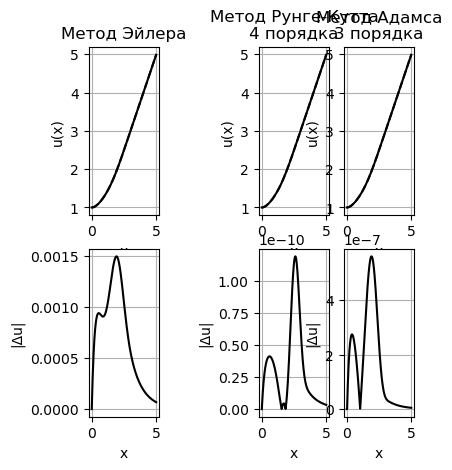

In [48]:
main1()

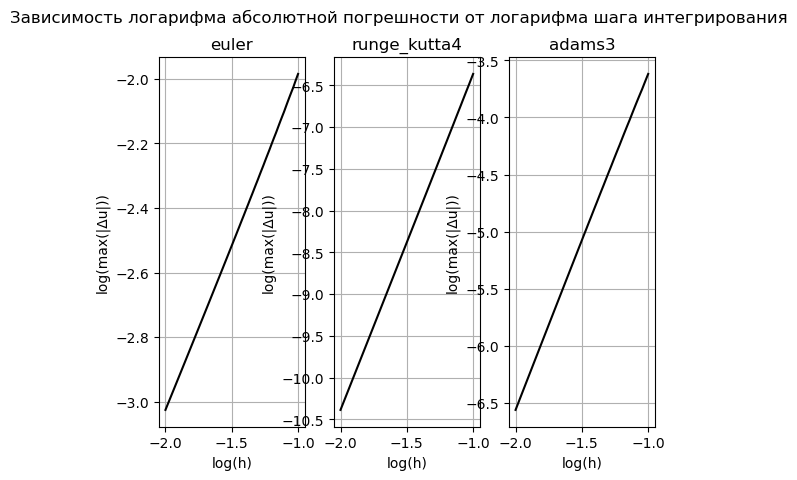

In [49]:
main2()